# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data set

In [2]:
df = pd.read_csv('kotak10yrs.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-11-19,309.075012,312.500000,307.000000,311.299988,309.432129,36240.0
1,2012-11-20,312.500000,315.950012,309.000000,310.625000,308.761200,33254.0
2,2012-11-21,310.399994,315.000000,310.350006,314.424988,312.538422,40696.0
3,2012-11-22,315.000000,315.750000,311.500000,314.125000,312.240295,25960.0
4,2012-11-23,314.500000,314.725006,311.000000,312.049988,310.177673,21046.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2468 non-null   object 
 1   Open       2466 non-null   float64
 2   High       2466 non-null   float64
 3   Low        2466 non-null   float64
 4   Close      2466 non-null   float64
 5   Adj Close  2466 non-null   float64
 6   Volume     2466 non-null   float64
dtypes: float64(6), object(1)
memory usage: 135.1+ KB


In [4]:
df.shape

(2468, 7)

# Visualising the Data

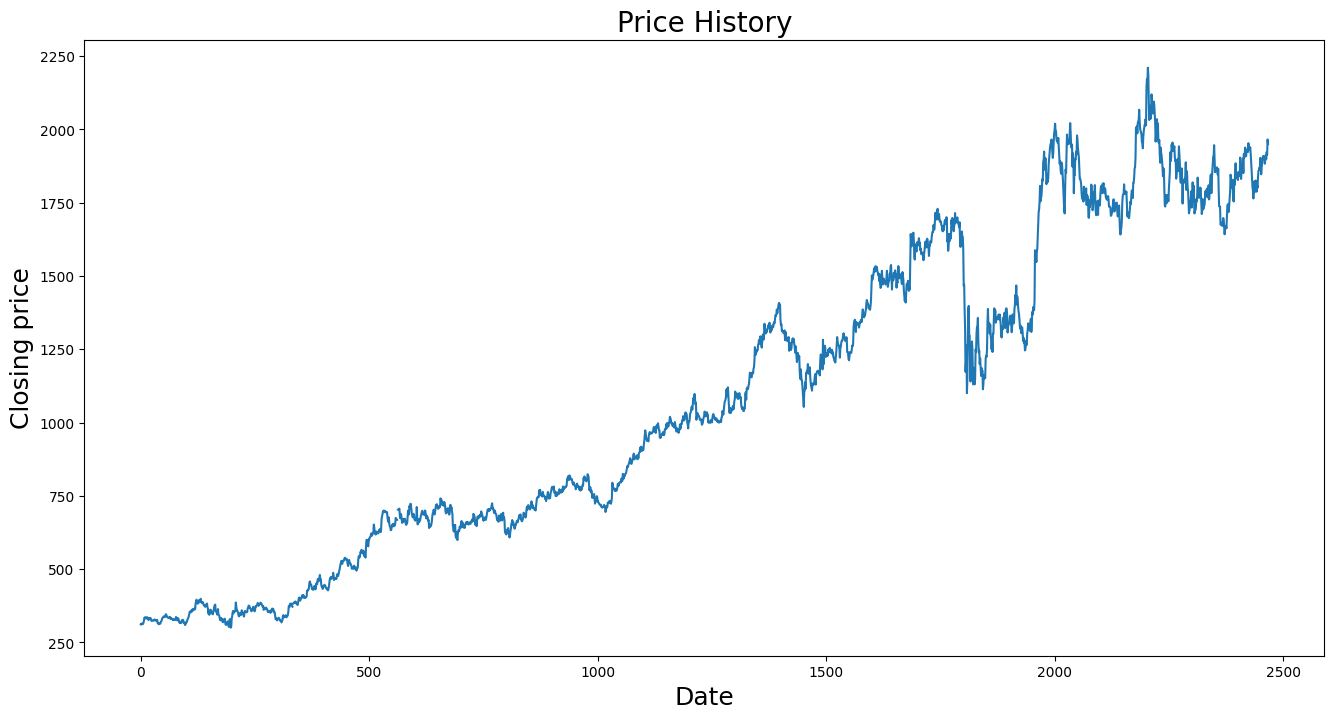

In [5]:
plt.figure(figsize=(16,8))
plt.title('Price History',fontsize=20)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price',fontsize=18)
plt.show()

array([[<AxesSubplot: title={'center': 'Open'}>,
        <AxesSubplot: title={'center': 'High'}>],
       [<AxesSubplot: title={'center': 'Low'}>,
        <AxesSubplot: title={'center': 'Close'}>],
       [<AxesSubplot: title={'center': 'Adj Close'}>,
        <AxesSubplot: title={'center': 'Volume'}>]], dtype=object)

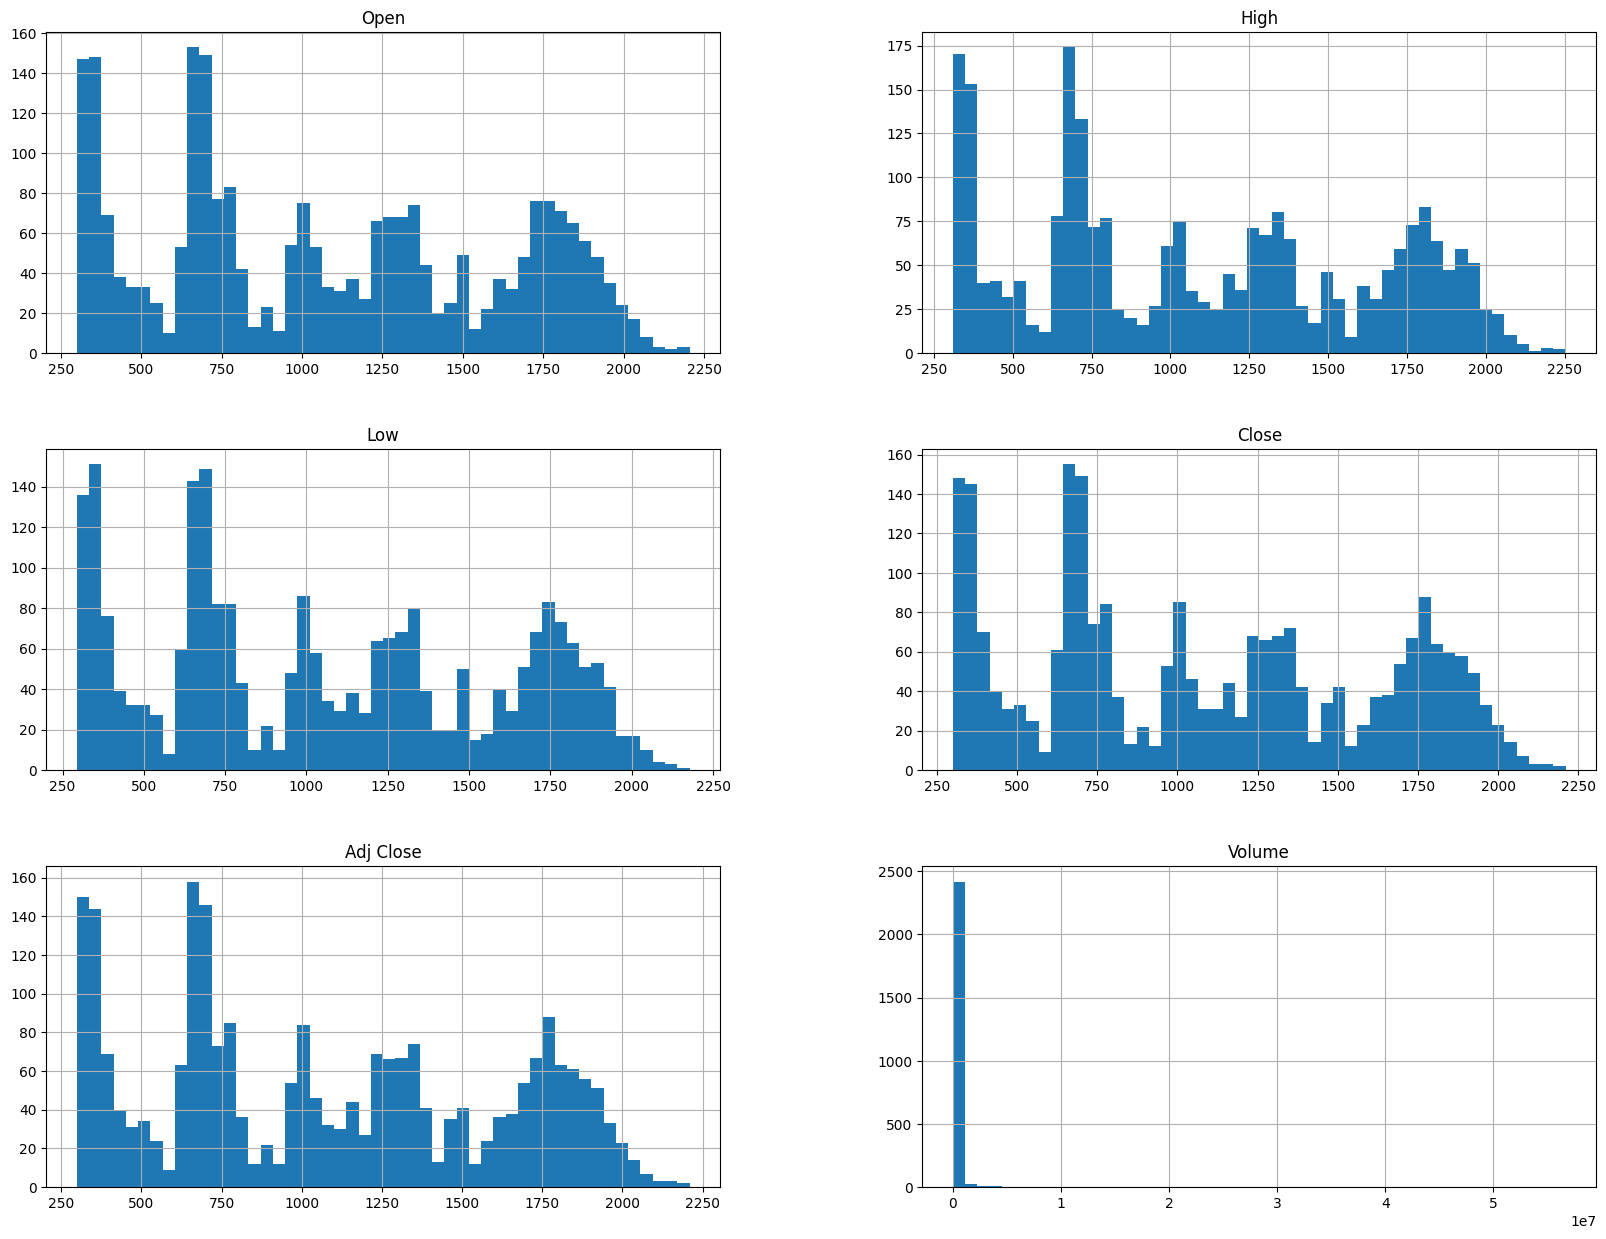

In [6]:
df.hist(bins = 50, figsize=(20,15))

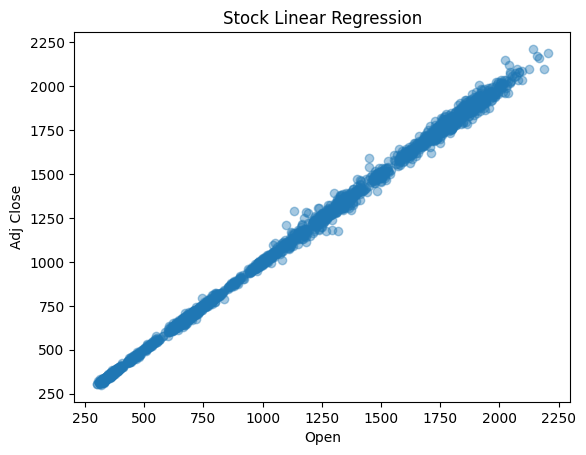

In [7]:
plt.scatter(df['Open'],df['Close'],alpha=0.4)
plt.xlabel('Open')
plt.ylabel('Adj Close')
plt.title('Stock Linear Regression')
plt.show()

# Checking Correlation

<AxesSubplot: >

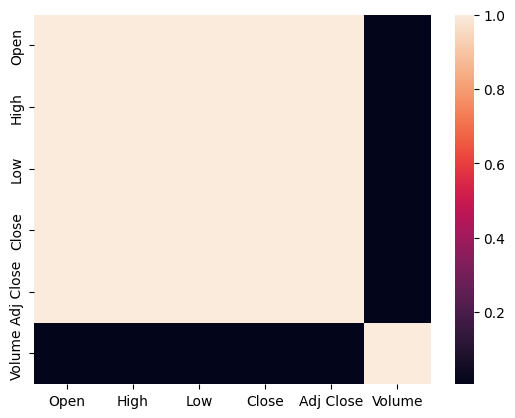

In [8]:
import seaborn as sns
sns.heatmap(df.corr())

# Data Cleaning

In [9]:
del df['Adj Close']
del df['Volume']
del df['Date']

In [10]:
df.dropna()
df = df[np.isfinite(df).all(1)]
df.head()

,Open,High,Low,Close
0,309.075012,312.500000,307.000000,311.299988
1,312.500000,315.950012,309.000000,310.625000
2,310.399994,315.000000,310.350006,314.424988
3,315.000000,315.750000,311.500000,314.125000
4,314.500000,314.725006,311.000000,312.049988


In [11]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [12]:
print(x.head())
print(y.head())

         Open        High         Low
0  309.075012  312.500000  307.000000
1  312.500000  315.950012  309.000000
2  310.399994  315.000000  310.350006
3  315.000000  315.750000  311.500000
4  314.500000  314.725006  311.000000
        Close
0  311.299988
1  310.625000
2  314.424988
3  314.125000
4  312.049988


# Splitting the Data

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=15)

# Using Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

lreg.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred1 = lreg.predict(x_test)
print(y_pred1)

[[1910.77062095]
 [1843.85916944]
 [1943.25454132]
 [1757.49466732]
 [1301.74973503]
 [1235.59140626]
 [ 706.46964477]
 [ 966.11362483]
 [ 752.04686006]
 [ 334.41399239]
 [1311.05077816]
 [1782.65054922]
 [ 662.62341537]
 [1799.36079078]
 [1292.3414025 ]
 [ 697.15256726]
 [1911.40835767]
 [1496.68177493]
 [ 323.41980449]
 [ 870.14207612]
 [ 526.76780503]
 [1250.38385625]
 [ 323.22206691]
 [ 789.33344597]
 [ 621.06298831]
 [ 998.87419489]
 [1590.62926221]
 [ 728.9567566 ]
 [1816.38840659]
 [ 313.25073859]
 [1498.45177657]
 [1918.54394244]
 [ 431.40614851]
 [1007.91257384]
 [ 372.06705401]
 [1228.13297714]
 [ 330.60044149]
 [ 731.27394131]
 [ 502.56377874]
 [ 990.5461758 ]
 [ 321.76744036]
 [1999.56145114]
 [1665.59160624]
 [1345.63533966]
 [ 474.55451244]
 [1536.52962578]
 [ 362.79106525]
 [ 678.07483147]
 [ 346.41951253]
 [2064.31254517]
 [ 692.76594444]
 [1615.23817978]
 [ 470.64999436]
 [1196.53094116]
 [ 345.62972177]
 [1127.3601148 ]
 [ 673.83269728]
 [ 470.04664925]
 [1795.2452776

In [16]:
lr_score = lreg.score(x_test,y_test)
print(lr_score)

0.9997808852063661


In [17]:
print(lreg.intercept_)

[0.36565878]


In [18]:
print(lreg.coef_)

[[-0.5226595   0.86370532  0.65669811]]


In [19]:
y_pred1 = lreg.predict(x)

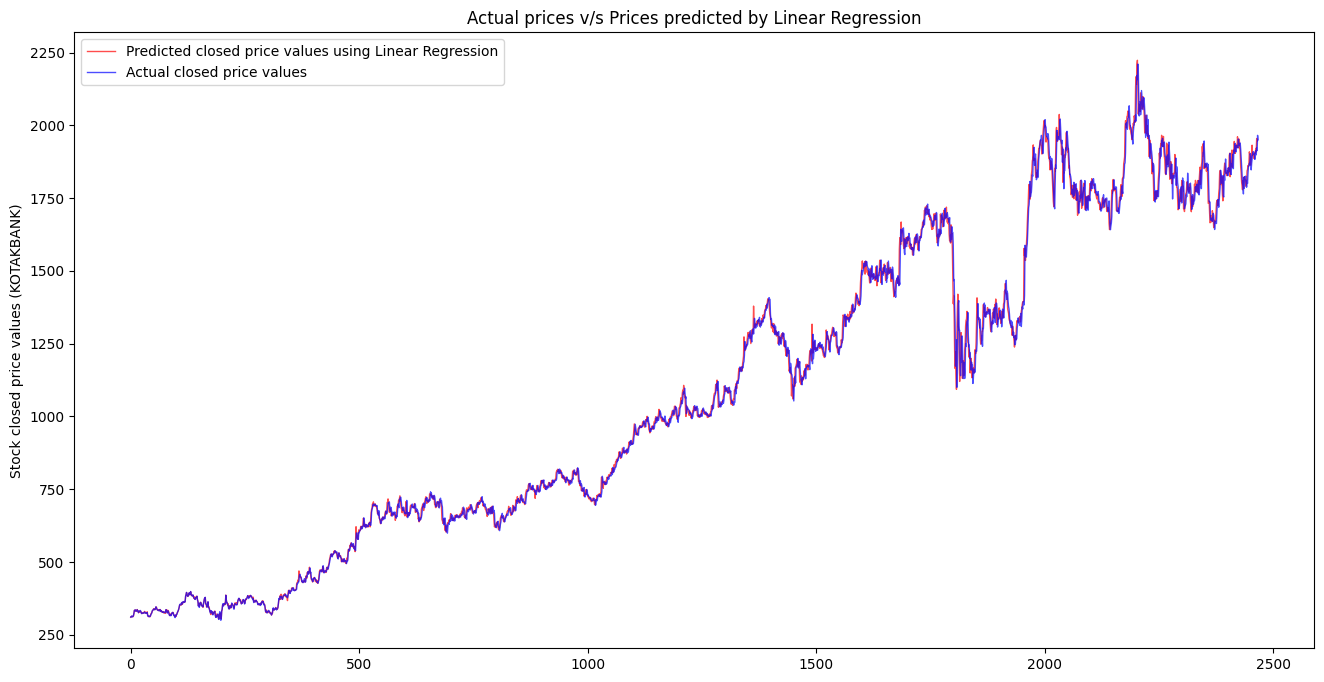

In [20]:
plt.figure(figsize=(16,8))
plt.ylabel("Stock closed price values (KOTAKBANK)")
plt.title("Actual prices v/s Prices predicted by Linear Regression")
plt.plot(y_pred1,label="Predicted closed price values using Linear Regression",linewidth=1,color='red',alpha=0.7)
plt.plot(df['Close'],linewidth=1,label="Actual closed price values",color='blue',alpha=0.7)
plt.legend()
plt.show()

# Using Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=100,random_state=15)
rfreg.fit(x_train,y_train)

/var/folders/bp/zqydd5252sj4yrld0wqwt9vh0000gn/T/ipykernel_9774/414665443.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(x_train,y_train)


RandomForestRegressor(random_state=15)

In [22]:
y_pred2 = rfreg.predict(x_test)
print(y_pred2)

[1914.58200574 1835.48702035 1971.28400513 1765.57600464 1297.29699343
 1238.1199986   711.8087518   966.21299028  757.23149784  331.57899874
 1326.14598877 1775.57748893  662.46574712 1798.26050644 1299.91049337
  697.0837596  1907.29151489 1489.06900024  324.21475006  869.62648884
  520.56300348 1246.71748309  326.41324442  787.05300228  622.77974676
 1001.604991   1600.21147946  732.52449712 1822.26548703  313.95100186
 1502.78301152 1919.02199959  431.98325042 1008.89599916  373.06075402
 1231.50400888  330.86649424  730.04900504  504.1249985   987.9975048
  318.32774694 2001.36149417 1667.40100346 1341.60848877  477.2337446
 1536.29051769  361.81825012  681.79899484  346.93224886 2060.13155537
  695.98325132 1609.4434911   467.08149724 1189.94900873  347.10274934
 1133.76750121  672.26300348  468.88975096 1799.3734899   355.30150384
  404.79024694  329.04449682 1480.48501229  801.31301248 1704.53749983
 1851.26800639  759.96849016 1739.17552132 1831.13902095 1066.39649649
  352.06

In [23]:
rfr_score = rfreg.score(x_test,y_test)
print(rfr_score)

0.9995466534902575


In [24]:
y_pred2 = rfreg.predict(x)

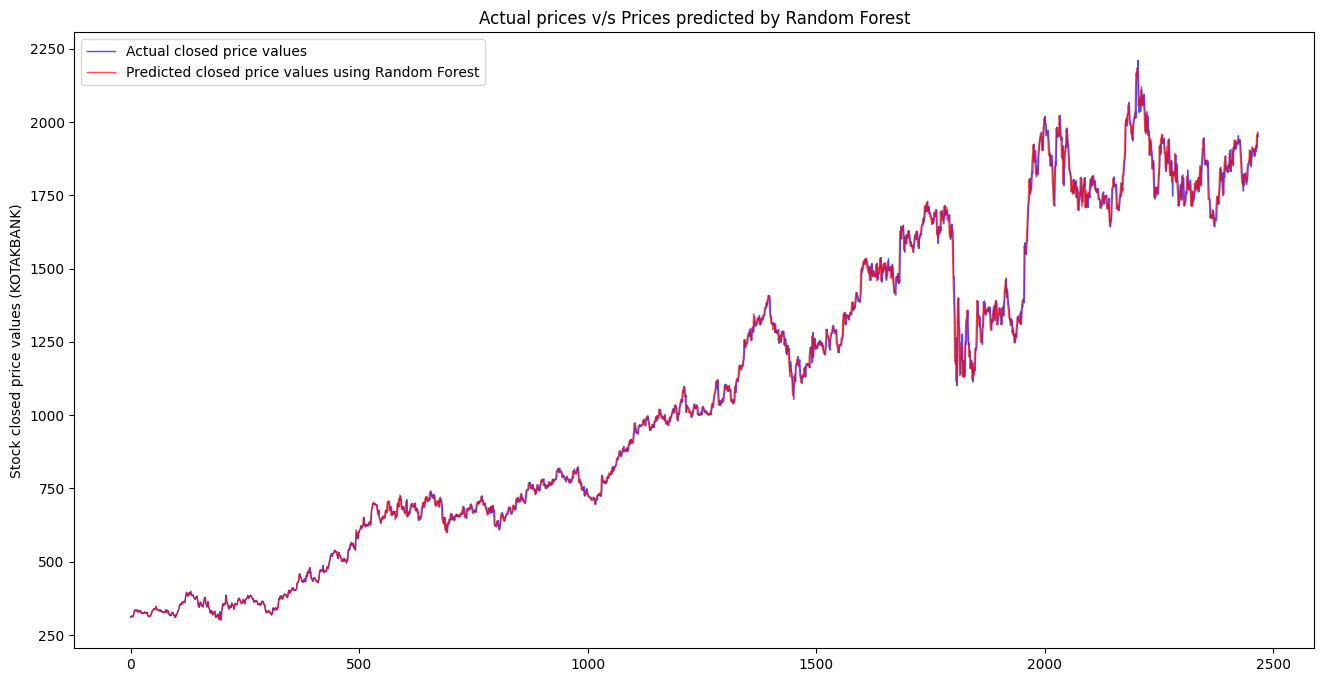

In [25]:
plt.figure(figsize=(16,8))
plt.ylabel("Stock closed price values (KOTAKBANK)")
plt.title("Actual prices v/s Prices predicted by Random Forest")
plt.plot(df['Close'],linewidth=1,label="Actual closed price values",color='blue',alpha=0.7)
plt.plot(y_pred2,label="Predicted closed price values using Random Forest",linewidth=1,color='red',alpha=0.7)
plt.legend()
plt.show()

# Using Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dstreg = DecisionTreeRegressor( max_depth=5)
dstreg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [28]:
y_pred3=dstreg.predict(x_test)
y_pred3

array([1908.40305087, 1843.49483305, 1984.46249644, 1784.10887185,
       1269.78450814, 1229.94651049,  694.76560899,  968.20000098,
        743.74249966,  324.89334953, 1367.40936792, 1784.10887185,
        646.52228313, 1784.10887185, 1324.65764028,  694.76560899,
       1908.40305087, 1472.182002  ,  324.89334953,  887.93269   ,
        515.10603697, 1269.78450814,  324.89334953,  791.77187425,
        646.52228313, 1013.48597533, 1604.25000002,  743.74249966,
       1843.49483305,  324.89334953, 1509.96666811, 1908.40305087,
        438.08703615, 1013.48597533,  361.51966715, 1229.94651049,
        324.89334953,  743.74249966,  515.10603697,  968.20000098,
        324.89334953, 1984.46249644, 1673.99284769, 1324.65764028,
        469.15714229, 1509.96666811,  361.51966715,  694.76560899,
        361.51966715, 2099.78752144,  694.76560899, 1604.25000002,
        469.15714229, 1163.96442358,  342.56964329, 1163.96442358,
        646.52228313,  469.15714229, 1784.10887185,  361.51966

In [29]:
dstreg_score = dstreg.score(x_test,y_test)
print(dstreg_score)

0.9983422860414769


In [30]:
y_pred3=dstreg.predict(x)

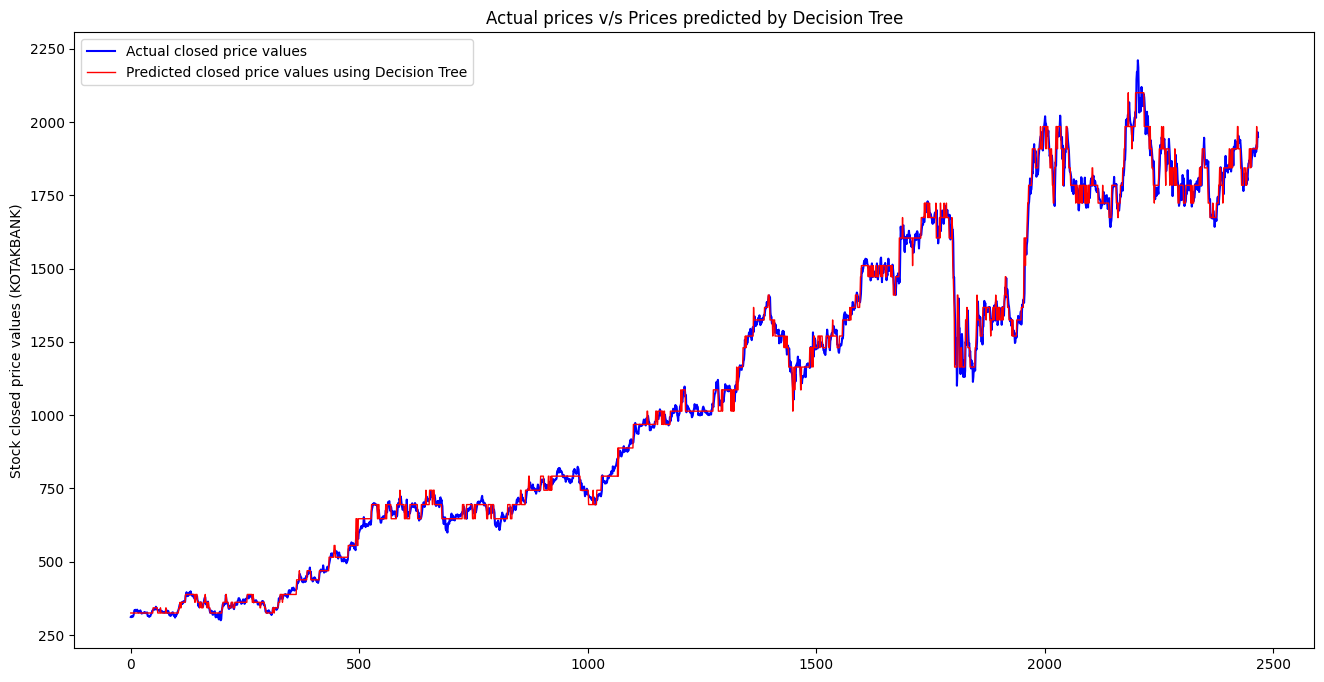

In [31]:
plt.figure(figsize=(16,8))
plt.ylabel("Stock closed price values (KOTAKBANK)")
plt.title("Actual prices v/s Prices predicted by Decision Tree")
plt.plot(df['Close'],linewidth=1.5,label="Actual closed price values",color='blue')
plt.plot(y_pred3,label="Predicted closed price values using Decision Tree",linewidth=1,color='red')
plt.legend()
plt.show()

# Comparison of Linear Regression, Random Forest and Decision Tree in predicting stock prices

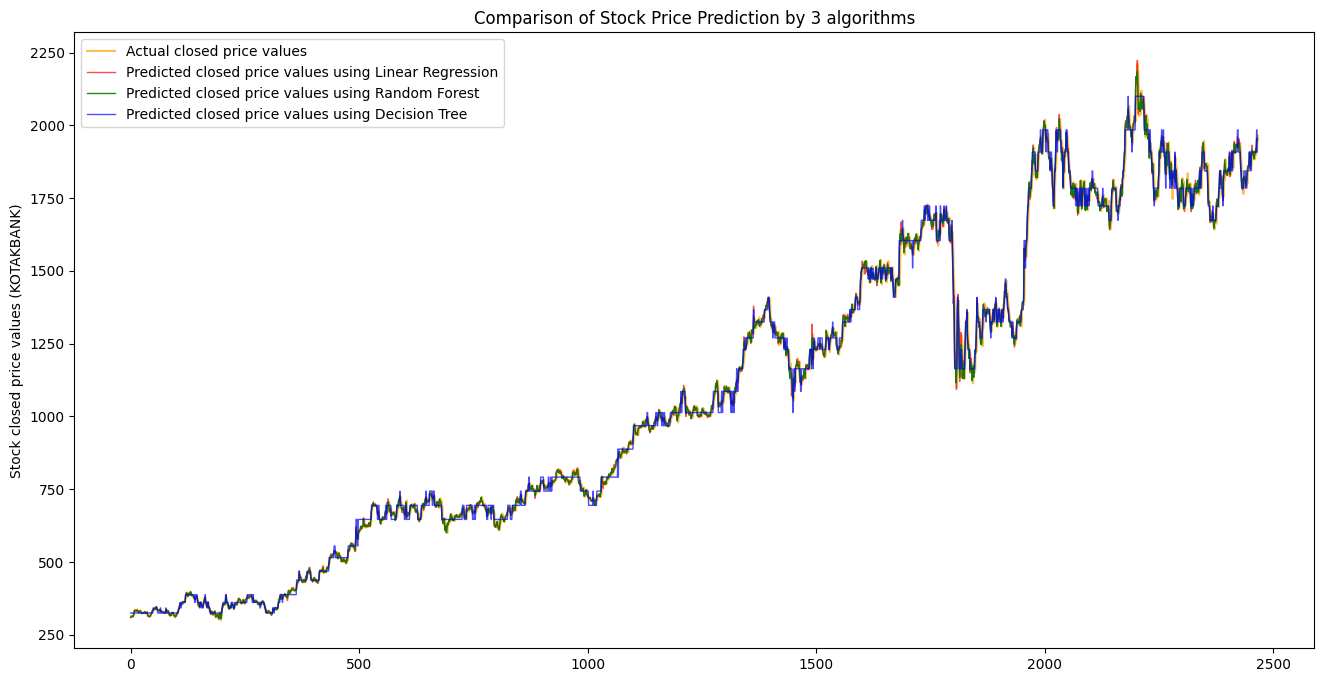

In [32]:
plt.figure(figsize=(16,8))
plt.ylabel("Stock closed price values (KOTAKBANK)")
plt.title("Comparison of Stock Price Prediction by 3 algorithms")
plt.plot(df['Close'],linewidth=1.5,label="Actual closed price values",color='orange',alpha=0.7)
plt.plot(y_pred1,label="Predicted closed price values using Linear Regression",linewidth=1,color='red',alpha=0.7)
plt.plot(y_pred2,label="Predicted closed price values using Random Forest",linewidth=1,color='green',alpha=0.9)
plt.plot(y_pred3,label="Predicted closed price values using Decision Tree",linewidth=1,color='blue',alpha=0.7)
plt.legend()
# plt.grid()
plt.show()

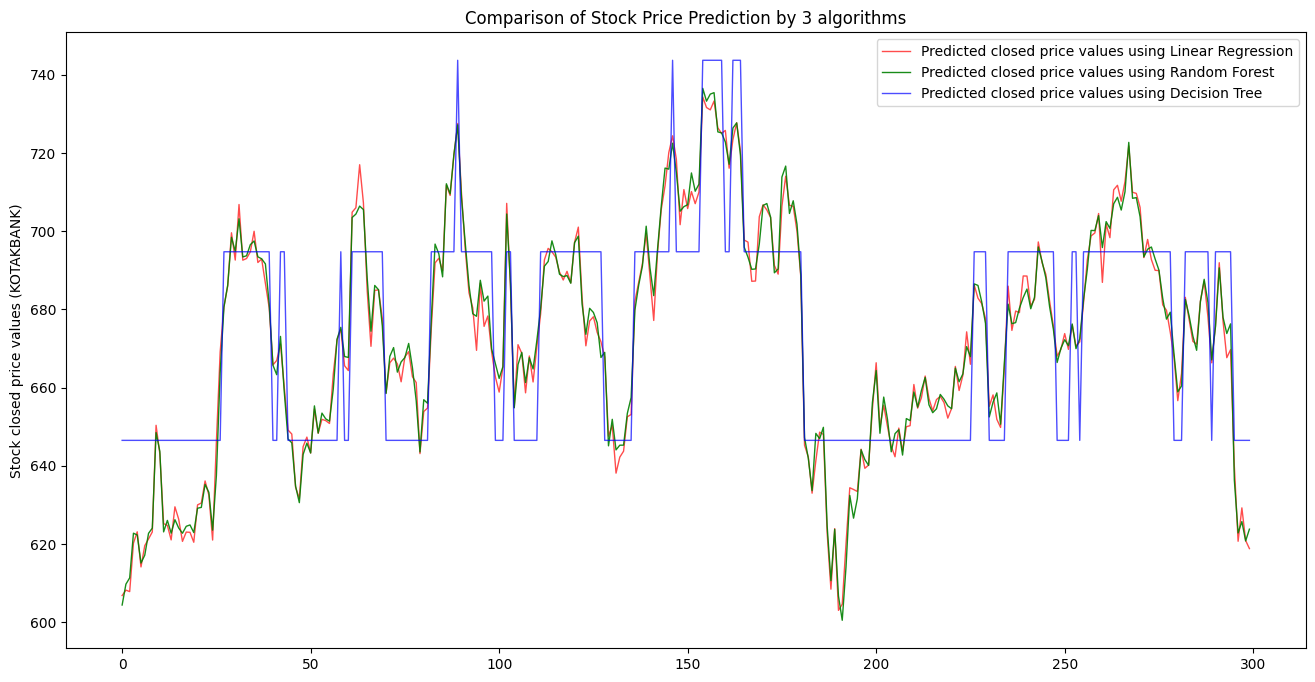

In [33]:
plt.figure(figsize=(16,8))
plt.ylabel("Stock closed price values (KOTAKBANK)")
plt.title("Comparison of Stock Price Prediction by 3 algorithms")
plt.plot(df.iloc[3:4,500:800],linewidth=1.5,label="Actual closed price values",color='orange',alpha=0.7)
plt.plot(y_pred1[500:800],label="Predicted closed price values using Linear Regression",linewidth=1,color='red',alpha=0.7)
plt.plot(y_pred2[500:800],label="Predicted closed price values using Random Forest",linewidth=1,color='green',alpha=0.9)
plt.plot(y_pred3[500:800],label="Predicted closed price values using Decision Tree",linewidth=1,color='blue',alpha=0.7)
plt.legend()
# plt.grid()
plt.show()

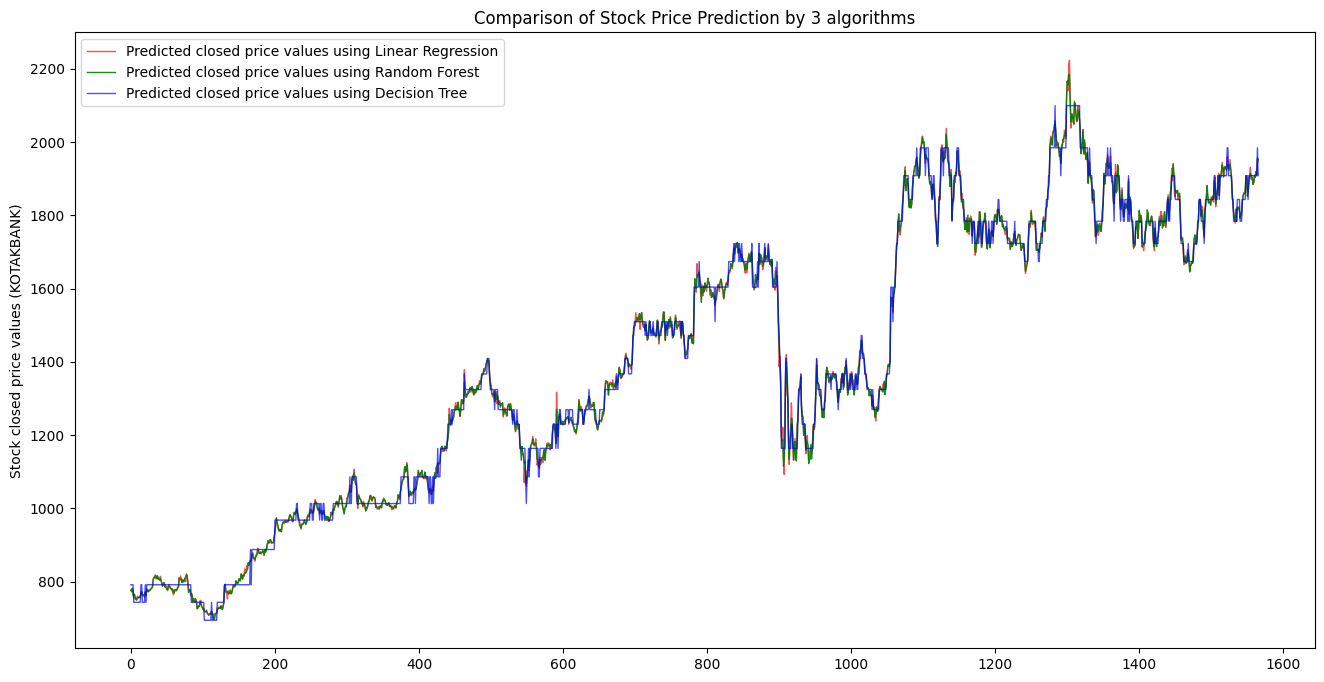

In [34]:
plt.figure(figsize=(16,8))
plt.ylabel("Stock closed price values (KOTAKBANK)")
plt.title("Comparison of Stock Price Prediction by 3 algorithms")
plt.plot(y_pred1[900:],label="Predicted closed price values using Linear Regression",linewidth=1,color='red',alpha=0.7)
plt.plot(y_pred2[900:],label="Predicted closed price values using Random Forest",linewidth=1,color='green',alpha=0.9)
plt.plot(y_pred3[900:],label="Predicted closed price values using Decision Tree",linewidth=1,color='blue',alpha=0.7)
plt.legend()
plt.show()

[99.9780885206366, 99.95466534902575, 99.8342286041477]


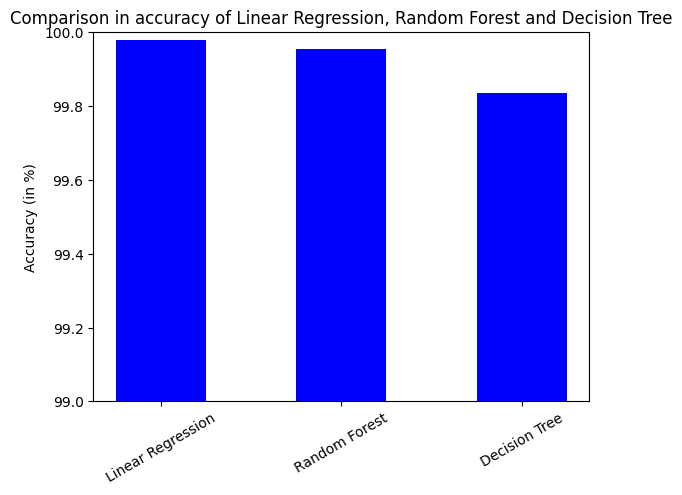

In [35]:
labels=['Linear Regression','Random Forest','Decision Tree']
values=[lr_score*100,rfr_score*100,dstreg_score*100]
print(values)
plt.bar(labels,values,color='blue',width=0.5)
plt.ylim(99,100)
plt.xticks(rotation=30)
plt.title("Comparison in accuracy of Linear Regression, Random Forest and Decision Tree")
plt.ylabel("Accuracy (in %)")
plt.show()

# Conclusion

1. In Linear Regression, values at the peaks are being overestimated
2. In Random Forest Regression, values at the high peaks are being underestimated
3. In Decision Tree Algorithm, values at the high peaks and high lows are sometimes being underestimated and sometimes being overestimated

Overall, Random Forest gave the most consistent prediction though Linear Regression has the highest accuracy overall followed by Random Forest and Decision Tree.